<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><b>Общий вывод по проекту</b></a></span></li><li><span><a href="#Общий-вывод-по-проекту-В2" data-toc-modified-id="Общий-вывод-по-проекту-В2-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><b>Общий вывод по проекту В2</b></a></span></li></ul></div>

# Отток клиентов

## Подготовка данных

Признаки

RowNumber — индекс строки в данных

CustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата

Целевой признак

Exited — факт ухода клиента

Загрузим датасет,посмотрем информацию по нему.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/datasets/Churn.csv')

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Сразу заметны особенности, которые могут помешать нам в дальнейшем исследовании:

Наличие в датасете излишних данных (столбцы RowNumber, CustomerId, Surname)
NaN-значения в столбце Tenure
Категориальные признаки - столбцы Geography и Gender


In [ ]:
#избавимся от лишней информации
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)

Найдены пустые значения в колонке Tenure, нет оснований думать, что это ушедшие клиенты, так как в колонке Exited только около 20% из них отмечены ушедшими. Среди этих же клиентов около 51% являются активными пользователями банковских услуг. Несмотря на это, решено удалить все столбцы с nan, так как они занимают меньше 10% данных, к тому же, модель не может учиться на таких данных.

In [ ]:
df = df.dropna(subset=['Tenure'])

Задействуем технику прямого кодирования, чтобы преобразовать категориальные признаки в численные.

In [ ]:
df_ohe = pd.get_dummies(df, drop_first=True)

In [ ]:
df_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Разобьем получившийся датасет на 3 выборки - обучающую, валидационную и тестовую.

In [ ]:
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)

features_train, features_rest, target_train, target_rest = train_test_split(features, target, test_size=.4, random_state=666)
features_valid, features_test, target_valid, target_test = train_test_split(features_rest, target_rest, test_size=.5, random_state=666)

In [ ]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(5454, 11)
(1818, 11)
(1819, 11)


In [ ]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']

In [ ]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Вывод:

ознакомились с данными,

выявили особенности датасета:
    
наличие в датасете излишних данных (столбцы RowNumber, CustomerId, Surname) - избавились
NaN-значения в столбце Tenure - заменили на 0

категориальные признаки - столбцы Geography и Gender

преобразовали категориальные признаки в численные с помощью техники прямого кодирования One-Hot Encoding,
разбили получившийся датасет на 3 выборки - обучающую, валидационную и тестовую,
масштабировали признаки методом стандартизации.

## Исследование задачи

In [ ]:
df_ohe[df_ohe['Exited'] == 0].count()

CreditScore          7237
Age                  7237
Tenure               7237
Balance              7237
NumOfProducts        7237
HasCrCard            7237
IsActiveMember       7237
EstimatedSalary      7237
Exited               7237
Geography_Germany    7237
Geography_Spain      7237
Gender_Male          7237
dtype: int64

In [ ]:
df_ohe[df_ohe['Exited'] == 1].count()

CreditScore          1854
Age                  1854
Tenure               1854
Balance              1854
NumOfProducts        1854
HasCrCard            1854
IsActiveMember       1854
EstimatedSalary      1854
Exited               1854
Geography_Germany    1854
Geography_Spain      1854
Gender_Male          1854
dtype: int64

<AxesSubplot:>

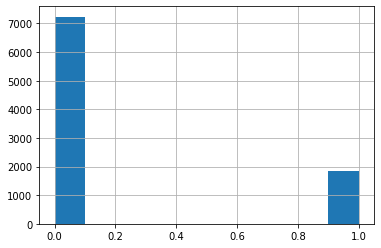

In [ ]:
df_ohe['Exited'].hist()

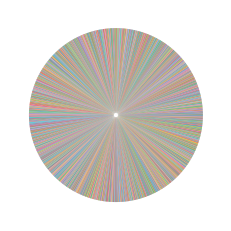

In [ ]:
plt.pie(df_ohe['Exited'])
plt.show()

В данных наблюдается дисбаланс классов, положительных ответов меньше практически в 4 раза. Построим 3 модели машинного обучения без корректировки дисбаланса, выявим лучшую на основе тестовых данных.

Дерево решений

In [ ]:
best_decision_tree_model = None
best_decision_tree_model_result = 0
for depth in range(1, 9):
	decision_tree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
	decision_tree_model.fit(features_train, target_train)
	predictions_decision_tree = decision_tree_model.predict(features_valid)
	result = f1_score(target_valid, predictions_decision_tree)
	if result > best_decision_tree_model_result:
		best_decision_tree_model = decision_tree_model
		best_decision_tree_model_result = result

print("F-1 мера лучшей модели DecisionTreeClassifier на валидационной выборке:", best_decision_tree_model_result)
print('Лучшая модель DecisionTree:', best_decision_tree_model)

F-1 мера лучшей модели DecisionTreeClassifier на валидационной выборке: 0.5564924114671164
Лучшая модель DecisionTree: DecisionTreeClassifier(max_depth=6, random_state=12345)


In [ ]:
probabilities_valid = decision_tree_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8109504805048195


Случайный лес

In [ ]:
best_random_forest_model = None
best_random_forest_model_result = 0
best_est = 0
best_depth = 0

for est in range(10, 101, 10):
    for depth in range(1, 21):
        random_forest_model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        random_forest_model.fit(features_train, target_train)
        predictions_random_forest = random_forest_model.predict(features_valid)
        result = f1_score(target_valid, predictions_random_forest)
        if result > best_random_forest_model_result:
            best_random_forest_model = random_forest_model
            best_random_forest_model_result = result
            best_est = est
            best_depth = depth

            print(random_forest_model, end=' ')
            print(result)

print('F1-мера лучшей модели RandomForest на валидационной выборке:', best_random_forest_model_result)
print(best_est)
print(best_depth)

RandomForestClassifier(max_depth=2, n_estimators=10, random_state=12345) 0.2018348623853211
RandomForestClassifier(max_depth=3, n_estimators=10, random_state=12345) 0.21363636363636365
RandomForestClassifier(max_depth=4, n_estimators=10, random_state=12345) 0.4319066147859922
RandomForestClassifier(max_depth=5, n_estimators=10, random_state=12345) 0.4761904761904762
RandomForestClassifier(max_depth=7, n_estimators=10, random_state=12345) 0.5272108843537415
RandomForestClassifier(max_depth=8, n_estimators=10, random_state=12345) 0.53156146179402
RandomForestClassifier(max_depth=9, n_estimators=10, random_state=12345) 0.5522875816993463
RandomForestClassifier(max_depth=13, n_estimators=10, random_state=12345) 0.563779527559055
RandomForestClassifier(max_depth=18, n_estimators=10, random_state=12345) 0.5714285714285714
RandomForestClassifier(max_depth=11, n_estimators=20, random_state=12345) 0.5746388443017657
RandomForestClassifier(max_depth=13, n_estimators=30, random_state=12345) 0.581

In [ ]:
probabilities_valid = random_forest_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8519562118273656


Логистическая регрессия

In [ ]:
from joblib import dump

logistic_regression_model = LogisticRegression(random_state=12345, solver='liblinear')
logistic_regression_model.fit(features_train, target_train)

predictions_logistic_regression = logistic_regression_model.predict(features_valid)
dump(logistic_regression_model, 'model_9_1.joblib')
logistic_regression_f1  = f1_score(target_valid, predictions_logistic_regression)

print('F1- мера модели LogisticRegression на валидационной выборке:', logistic_regression_f1)

F1- мера модели LogisticRegression на валидационной выборке: 0.31539888682745826


In [ ]:
probabilities_valid = logistic_regression_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.7430095232581699


На валидационных данных без корректировки дисбаланса лучший показатель F-1 меры у модели случайного леса = 0.58

## Борьба с дисбалансом

Попытаемся улучшить результаты после корректировки балансов. Воспользуемся взвешиванием классов, увеличением или уменьшением выборки, изменением порогов.

Взвешивание классов

Дерево решений

In [ ]:
best_decision_tree_model = None
best_decision_tree_model_result = 0
for depth in range(1, 9):
	decision_tree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
	decision_tree_model.fit(features_train, target_train)
	predictions_decision_tree = decision_tree_model.predict(features_valid)
	result = f1_score(target_valid, predictions_decision_tree)
	if result > best_decision_tree_model_result:
		best_decision_tree_model = decision_tree_model
		best_decision_tree_model_result = result

print("F-1 мера лучшей модели DecisionTreeClassifier на валидационной выборке:", best_decision_tree_model_result)
print('Лучшая модель DecisionTree:', best_decision_tree_model)

F-1 мера лучшей модели DecisionTreeClassifier на валидационной выборке: 0.5771144278606966
Лучшая модель DecisionTree: DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=12345)


In [ ]:
probabilities_valid = decision_tree_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8196288751555851


Случайный лес

In [ ]:
dbest_random_forest_model = None
best_random_forest_model_result = 0
best_est = 0
best_depth = 0

for est in range(10, 101, 10):
    for depth in range(1, 21):
        random_forest_model = RandomForestClassifier(random_state=12345, n_estimators=est,
                                                     max_depth=depth, class_weight='balanced')
        random_forest_model.fit(features_train, target_train)
        predictions_random_forest = random_forest_model.predict(features_valid)
        result = f1_score(target_valid, predictions_random_forest)
        if result > best_random_forest_model_result:
            best_random_forest_model = random_forest_model
            best_random_forest_model_result = result
            best_est = est
            best_depth = depth

            print(random_forest_model, end=' ')
            print(result)

print('F1-мера лучшей модели RandomForest на валидационной выборке:', best_random_forest_model_result)
print(best_est)
print(best_depth)

RandomForestClassifier(class_weight='balanced', max_depth=1, n_estimators=10,
                       random_state=12345) 0.5138248847926269
RandomForestClassifier(class_weight='balanced', max_depth=2, n_estimators=10,
                       random_state=12345) 0.5533769063180829
RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=10,
                       random_state=12345) 0.5582761998041135
RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=10,
                       random_state=12345) 0.577922077922078
RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=10,
                       random_state=12345) 0.5847457627118644
RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=10,
                       random_state=12345) 0.590455049944506
RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=20,
                       random_state=12345) 0.5995423340961099
RandomForestClassifier

In [ ]:
probabilities_valid = random_forest_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

Логистическая регрессия

In [ ]:
logistic_regression_model = LogisticRegression(random_state=12345, solver='liblinear',
                                               class_weight='balanced')
logistic_regression_model.fit(features_train, target_train)

predictions_logistic_regression = logistic_regression_model.predict(features_valid)
dump(logistic_regression_model, 'model_9_1.joblib')
logistic_regression_f1  = f1_score(target_valid, predictions_logistic_regression)

print('F1- мера модели LogisticRegression на валидационной выборке:', logistic_regression_f1)

In [ ]:
probabilities_valid = logistic_regression_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

Взвешивание классов сильно помогло логистической регрессии, ее показатель вырос с 0.31 до 0.48, но это все равно не дотягивает до нужного нам уровня. После взвешивания классов модель случайного случайного смогла показать F-1 равный 0.6.

Увеличение выборки

In [ ]:
from sklearn.utils import shuffle

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

In [ ]:
target_upsampled.value_counts(normalize=True)

Дерево решений

In [ ]:
decision_tree_model = DecisionTreeClassifier(max_depth=7, random_state=12345)
decision_tree_model.fit(features_upsampled, target_upsampled)
predicted_valid = decision_tree_model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

In [ ]:
probabilities_valid = decision_tree_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

Случайный лес

In [ ]:
random_forest_model = RandomForestClassifier(random_state=12345, n_estimators=100,
                                                      max_depth=6)
random_forest_model.fit(features_upsampled, target_upsampled)
predicted_valid = random_forest_model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

In [ ]:
probabilities_valid = random_forest_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

Логистическя регрессия

In [ ]:
logistic_regression_model = LogisticRegression(random_state=12345, solver='liblinear')
logistic_regression_model.fit(features_upsampled, target_upsampled)
predicted_valid = logistic_regression_model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

In [ ]:
probabilities_valid = logistic_regression_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

Увеличение выборки позволяет нам достичь таких же результатов, каких принес нам метод взвешивания с моделью случайного леса, F-1 = 0.6, AUC-ROC = 0.844.

**Измнение порога**


Дерево решений

In [ ]:
decision_tree_model = DecisionTreeClassifier(max_depth=7, random_state=12345)
decision_tree_model.fit(features_upsampled, target_upsampled)
probabilities_valid = decision_tree_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 1, 0.1):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    F_1 = f1_score(target_valid, predicted_valid)


    print(threshold, ' ', precision, recall, F_1)

In [ ]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

In [ ]:
random_forest_model = RandomForestClassifier(random_state=12345, n_estimators=100,
                                                      max_depth=6)
random_forest_model.fit(features_upsampled, target_upsampled)
probabilities_valid = random_forest_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print(probabilities_one_valid)
print('---')

for threshold in np.arange(0, 1, 0.1):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    F_1 = f1_score(target_valid, predicted_valid)

    print(predicted_valid * 1)



    print(threshold, precision, recall, F_1)

In [ ]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

In [ ]:
logistic_regression_model = LogisticRegression(random_state=12345, solver='liblinear')

logistic_regression_model.fit(features_upsampled, target_upsampled)
probabilities_valid = logistic_regression_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 1, 0.1):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    F_1 = f1_score(target_valid, predicted_valid)
    print(threshold, precision, recall, F_1)

In [ ]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

Из 3 методов борьбы с дисбалансом лучшие результаты показали такие способы, как взвешивание классов и увеличение выборки, они позволили достичь F-1 0.6.

## Тестирование модели

Лучшие результаты показала нам модель случайного леса. Сделаем финальное тестирование с взвешиванием классов и увеличением выборки по отдельности.

In [ ]:
random_forest_model = RandomForestClassifier(random_state=12345, n_estimators=100,
                                                      max_depth=9, class_weight='balanced')
random_forest_model.fit(features_train, target_train)
predicted_valid = random_forest_model.predict(features_test)
print("F1:", f1_score(target_test, predicted_valid))

In [ ]:
probabilities_valid = random_forest_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

Увеличение выборки

In [ ]:
random_forest_model = RandomForestClassifier(random_state=12345, n_estimators=100,
                                                      max_depth=9)
random_forest_model.fit(features_upsampled, target_upsampled)
predicted_valid = random_forest_model.predict(features_test)
print("F1:", f1_score(target_test, predicted_valid))

In [ ]:
probabilities_valid = random_forest_model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_valid)

print(auc_roc)

Победитель - модель случайного леса с количеством деревьев 100, глубиной 9. Целевого показателя качества помогает достичь взвешивание классов, показатель AUC-ROC = 0.848

Перед тем, как построить модель, которая прогнозирует отток клиентов, была проделана работа по подготовке данных. 1) Удалены ненужные строки, которые могут ввести в заблуждение модель. 2) Категориальные столбцы переведены в числовые методом прямого кодирования, так как модели умеют работать только с числовыми значениями. 3) Числовые столбцы тоже изменены – приведены к одному масштабу, это делается для того, чтобы модель не посчитала одни категории данных более приоритетными, чем другие. Все данные разделены на 3 части, 60% использовались для обучения, 20% - для валидации и проверки методов устранения дисбаланса классов, 20% - для финального тестирования на работоспособность модели.

Выяснилось, что в данных есть сильный перекос в сторону негативных ответов. То есть клиентов, отказавшихся от сотрудничества банка, в 4 раза меньше, чем тех, кто не отказался. Для того, чтобы модели обучились равномерно и могли адекватно предсказывать как положительные, так и отрицательные ответы, было применено взвешивание классов и увеличение выборки положительных ответов. Таким образом, выяснилось, что лучшая модель для нашей задачи – это модель случайного леса со следующими гиперпараметрами: глубина – 9, количество деревьев – 100. С такими данными удалось достичь F-1 равной 0.6, а AUC-ROC = 0.848.